In [1]:
"""
Plot the tuning parameters of individual units in each network - after fitting 
curves to the orientation tuning functions.
Before this, run get_orient_tuning_avgspace.py and analyze_orient_tuning_jitter.py to 
compute the tuning curves and fit their parameters.
"""

import matplotlib.pyplot as plt
import os, sys
import numpy as np
from matplotlib import cm
from copy import deepcopy

##%% paths
root = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(os.path.join(root, 'code', 'analysis_code'))
import load_activations
import plot_utils
import analyze_orient_tuning_jitter

colors_main, colors_sf = plot_utils.get_cmaps_biasCNN()

figfolder = os.path.join(root,'figures','UnitTuning')

In [2]:
#%% Parameters

# define which network to load - uncomment one of these lines

# training_strs = ['scratch_imagenet_rot_0_cos_stop_early']   # a randomly initialized, un-trained model
# training_strs = ['scratch_imagenet_rot_0_cos']  # model trained on upright images
# training_strs = ['scratch_imagenet_rot_22_cos']   # model trained on 22 deg rot iamges
# training_strs = ['scratch_imagenet_rot_45_cos']   # model trained on 45 deg rot images
training_strs = ['pretrained']   # a pre-trained model 

#%% define other basic parameters
nImageSets = 4 # number of versions of evaluation (filtered images) set
model='vgg16'
param_str='params1'
dataset_str=['FiltIms14AllSFCos'] # this is just the codename for my main filtered image set

if 'pretrained' in training_strs[0]:
  init_nums=[0]
  ckpt_strs=['0']
  # which color to use - [0,1,2,3,4] are for [random, trained upright, trained 22 rot, trained 45 rot, pretrained]
  color_ind=4
elif 'stop_early' in training_strs[0]:
  init_nums=[0,1,2,3]
  ckpt_strs=['0']
  color_ind=0
else:
  init_nums=[0,1,2,3]
  ckpt_strs=['400000']  
  if '0' in training_strs[0]:
    color_ind=1
  elif '22' in training_strs[0]:
    color_ind=2
  elif '45' in training_strs[0]:
    color_ind=3
    
nInits = np.size(init_nums)
param_strs=[]
for ii in range(len(init_nums)):    
  if init_nums[ii]>0:
    param_strs.append(param_str+'_init%d'%init_nums[ii])
  else:
    param_strs.append(param_str)

nTrainingSchemes = 1

# when identifying well-fit units, what criteria to use?
r2_cutoff = 0.4;

# this set doesn't have different spat frequency levels, just broadband
sf_labels=['broadband SF']
nSF=1
sf=0

In [3]:
#%% loop to load all the data (orientation tuning fit parameters for all units)
tr=0
training_str = training_strs[tr]
ckpt_num = ckpt_strs[tr]
dataset = dataset_str[tr]  

for ii in range(nInits):

  # path info  
  param_str = param_strs[ii]
  save_path = os.path.join(root,'saved_analyses','unit_tuning',model,training_str,param_str,dataset) 
 
  # get information about the images/network
  if ii==0:
     info = load_activations.get_info(model,dataset)
     nSF = np.size(np.unique(info['sflist']))
     nLayers = info['nLayers']      
     layer_labels = info['layer_labels']    
     nOri = info['nOri']
     ori_axis = np.arange(0, nOri,1)
         
     # initialize these arrays (will be across all init of the network)     
     fit_pars_all = [] 
     r2_all = []    
    
  # find the random seed(s) for the jitter that was used
  files=os.listdir(os.path.join(save_path))
  [jitt_file] = [ff for ff in files if '%s_fit_jitter'%layer_labels[0] in ff and 'pars_eval_at_ckpt_%s'%ckpt_num in ff];  
  rand_seed_str = jitt_file[jitt_file.find('jitter')+7:jitt_file.find('jitter')+13]  

  fit_pars = [] 
  r2 = []   

  # loop over layers and load fit parameters
  for ll in range(nLayers):
   
    # load fit r2 [nUnits x nSF x nImageSets] 
    file_name= os.path.join(save_path,'%s_fit_jitter_%s_r2_each_sample_eval_at_ckpt_%s0000.npy'%(layer_labels[ll],rand_seed_str,ckpt_num[0:2]))
    print('loading from %s\n'%file_name)
    r2.append(np.load(file_name))
    
    # load the fit parameters [nUnits x nSF x nPars]
    # in par dimension, [0,1,2,3,4] are [center, k, amplitude, baseline, FWHM size]
    file_name= os.path.join(save_path,'%s_fit_jitter_%s_pars_eval_at_ckpt_%s0000.npy'%(layer_labels[ll],rand_seed_str,ckpt_num[0:2]))
    print('loading from %s\n'%file_name)
    fit_pars.append(np.load(file_name))
   
  r2_all.append(r2)
  fit_pars_all.append(fit_pars)


loading from /mnt/neurocube/local/serenceslab/maggie/biasCNN/saved_analyses/unit_tuning/vgg16/pretrained/params1/FiltIms14AllSFCos/conv1_1_fit_jitter_756667_r2_each_sample_eval_at_ckpt_00000.npy

loading from /mnt/neurocube/local/serenceslab/maggie/biasCNN/saved_analyses/unit_tuning/vgg16/pretrained/params1/FiltIms14AllSFCos/conv1_1_fit_jitter_756667_pars_eval_at_ckpt_00000.npy

loading from /mnt/neurocube/local/serenceslab/maggie/biasCNN/saved_analyses/unit_tuning/vgg16/pretrained/params1/FiltIms14AllSFCos/conv1_2_fit_jitter_756667_r2_each_sample_eval_at_ckpt_00000.npy

loading from /mnt/neurocube/local/serenceslab/maggie/biasCNN/saved_analyses/unit_tuning/vgg16/pretrained/params1/FiltIms14AllSFCos/conv1_2_fit_jitter_756667_pars_eval_at_ckpt_00000.npy

loading from /mnt/neurocube/local/serenceslab/maggie/biasCNN/saved_analyses/unit_tuning/vgg16/pretrained/params1/FiltIms14AllSFCos/pool1_fit_jitter_756667_r2_each_sample_eval_at_ckpt_00000.npy

loading from /mnt/neurocube/local/serences

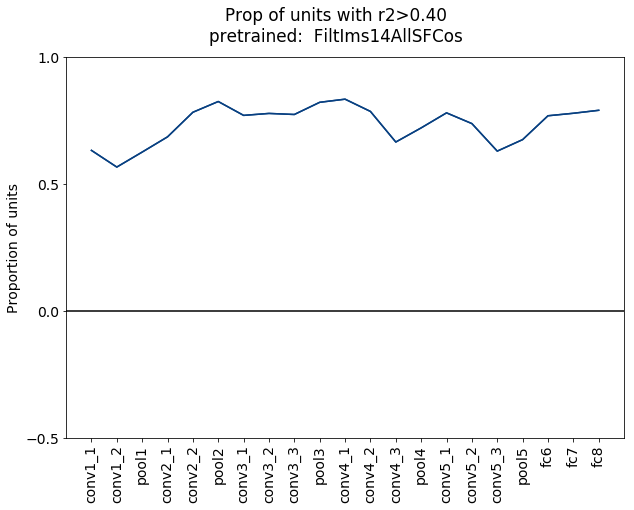

In [4]:
#%% Plot the proportion of units above r2 threshold, as a function of layer

# Supp Figure 1A

plt.rcParams.update({'font.size': 14})
plt.close('all')
fig=plt.figure()
layers2plot = np.arange(0,nLayers,1)

prop_vals = np.zeros([nInits, np.size(layers2plot)])

for ii in range(nInits):
  # loop over network layers
  for ll in range(np.size(layers2plot)):
  
    # values to plot    
    rvals = deepcopy(np.squeeze(np.mean(r2_all[ii][layers2plot[ll]][:,sf,:],axis=1)))   
    # there are a few nans in here, putting a tiny value so it won't throw an error
    rvals[np.isnan(rvals)] = -1000
  
    prop_vals[ii,ll] = np.sum(rvals>r2_cutoff)/np.size(rvals)
   
meanvals = np.mean(prop_vals,axis=0)
sdvals = np.std(prop_vals,axis=0)
plt.errorbar(np.arange(0,np.size(layers2plot),1),meanvals,sdvals,color = colors_main[color_ind,:])
plt.plot(np.arange(0,np.size(layers2plot),1),meanvals,'-',color = colors_main[color_ind,:])
ylims = [-0.5,1]
xlims = [-1, np.size(layers2plot)]

plt.plot(xlims, [0,0], 'k')
plt.xlim(xlims)
plt.ylim(ylims)
plt.yticks([-0.5,0, 0.5,1])
plt.ylabel('Proportion of units')
plt.xticks(np.arange(0,np.size(layers2plot),1),[layer_labels[ii] for ii in layers2plot],rotation=90)

# finish up the entire plot
plt.suptitle('Prop of units with r2>%.2f\n%s:  %s'%(r2_cutoff,training_str,dataset))  
fig.set_size_inches(10,7)
figname = os.path.join(figfolder, '%s_pct_units_vs_layer.pdf' % (training_str))
#plt.savefig(figname, format='pdf',transparent=True)

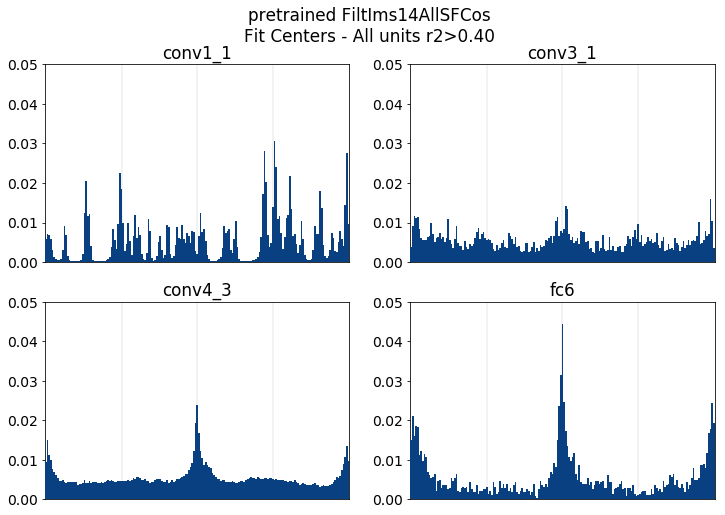

In [5]:
#%% Plot histogram of tuning centers.

# Figure 2B, Figure 7, Supp Figure 1B

# plot for a selected 4 layers only
layers2plot=[0,6,12,18]

plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42    
plt.rcParams['figure.figsize']=[14,10]

# bins for the histograms
ori_bin_size=1
ori_bins = np.arange(-ori_bin_size/2,nOri+ori_bin_size,ori_bin_size)
bin_centers = ori_bins[0:np.size(ori_bins)-1]+ori_bin_size/2

ylims = [0, 0.05]

npx = np.ceil(np.sqrt(np.size(layers2plot)))
npy = np.ceil(np.size(layers2plot)/npx)
plt.close('all')
plt.figure(figsize=(12,8))
for ll in range(np.size(layers2plot)):
  plt.subplot(npx,npy, ll+1)
   
  # combine centers from all network initializations into one big distribution
  vals_all = []
  for ii in range(nInits):
    vals = deepcopy(np.squeeze(fit_pars_all[ii][layers2plot[ll]][:,sf,0]))
    rvals = deepcopy(np.squeeze(np.mean(r2_all[ii][layers2plot[ll]][:,sf,:],axis=1)))   
    rvals[np.isnan(rvals)] = -1000    
    vals=vals[np.where(rvals>r2_cutoff)[0]]
    
    vals_all = np.concatenate((vals_all,vals),axis=0)

  vals_all = np.ravel(vals_all)
  h = np.histogram(vals_all, ori_bins) 
  # divide by total to get a proportion.
  real_y = h[0]/np.sum(h[0])
  
  plt.bar(bin_centers, real_y,width=ori_bin_size,color=colors_main[color_ind,:],zorder=100)
  
  for xx in np.arange(45,180,45):
    plt.axvline(xx,color=[0.95, 0.95, 0.95],linewidth=2)
  plt.xlim([np.min(ori_bins), np.max(ori_bins)])
  plt.ylim(ylims)
  plt.title('%s'%(layer_labels[layers2plot[ll]])) 
 
  if ll==nLayers-1:
      plt.xlabel('Orientation (deg)')
      plt.ylabel('Prop. Units')
      plt.xticks(np.arange(0,nOri+1,45))
  else:
      plt.xticks([]) 
      
plt.suptitle('%s %s\nFit Centers - All units r2>%.2f'%(training_str,dataset,r2_cutoff));


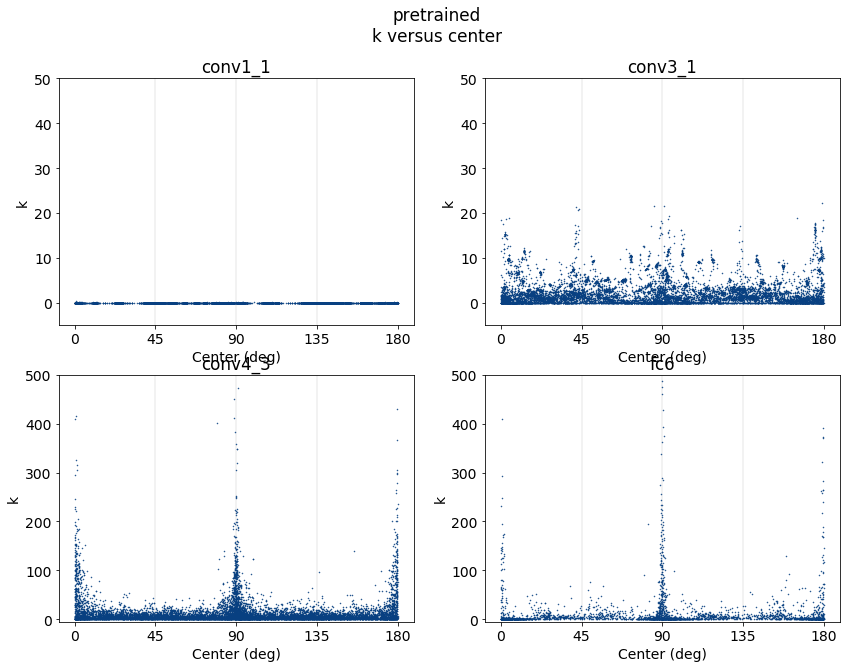

In [6]:
#%% Plot K versus the center (scatter plot)

# Figure 2C, Figure 7

# plot for a selected 4 layers only
layers2plot=[0,6,12,18]

plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42    
plt.rcParams['figure.figsize']=[14,10]
maxpts = 10000 # downsampling a bit here to make the figure tractable to save
pp2plot=1 # index of k in the parameters array
ppname='k'
ylims = [[-5,50],[-5,50],[-5,500],[-5,500]]

alpha_vals=[1,1,1,1]
npx = np.ceil(np.sqrt(np.size(layers2plot)))
npy = np.ceil(np.size(layers2plot)/npx)
plt.close('all')

plt.figure()
for ll in range(np.size(layers2plot)):
  plt.subplot(npx,npy, ll+1)
 
  allc = []  # going to combine data across all initializations
  allk = []
  for ii in range(nInits):
    rvals = deepcopy(np.squeeze(np.mean(r2_all[ii][layers2plot[ll]][:,sf,:],axis=1)))
    rvals[np.isnan(rvals)] = -1000
    inds2use = np.where(rvals>r2_cutoff)[0]
    # get values of center and other parameter of interest (k)
    cvals = deepcopy(np.squeeze(fit_pars_all[ii][layers2plot[ll]][inds2use,sf,0]))
    parvals = deepcopy(np.squeeze(fit_pars_all[ii][layers2plot[ll]][inds2use,sf,pp2plot]))    
   
    allc = np.concatenate((allc,cvals),axis=0)
    allk = np.concatenate((allk,parvals),axis=0)
    
  cvals=allc
  parvals=allk
  my_alpha=alpha_vals[ll]
  
  if np.size(cvals)>maxpts:
    inds2plot = np.random.randint(0,np.size(cvals),maxpts)
  else:
    inds2plot = np.arange(0,np.size(cvals))
  plt.plot(cvals[inds2plot],parvals[inds2plot],'.',markersize=1,color=colors_main[color_ind,:],alpha=my_alpha,zorder=100)

  plt.title(layer_labels[layers2plot[ll]])
  plt.ylim(ylims[ll])
  plt.xlabel('Center (deg)')
  plt.ylabel(ppname)
  plt.xticks(np.arange(0,181,45))
  
  for xx in np.arange(45,180,45):
    plt.axvline(xx,color=[0.95, 0.95, 0.95],linewidth=2)
  
plt.suptitle('%s\n%s versus center'%(training_str,ppname))

figname = os.path.join(figfolder, '%s_%s.pdf' % (training_str,ppname))
#plt.savefig(figname, format='pdf',transparent=True)


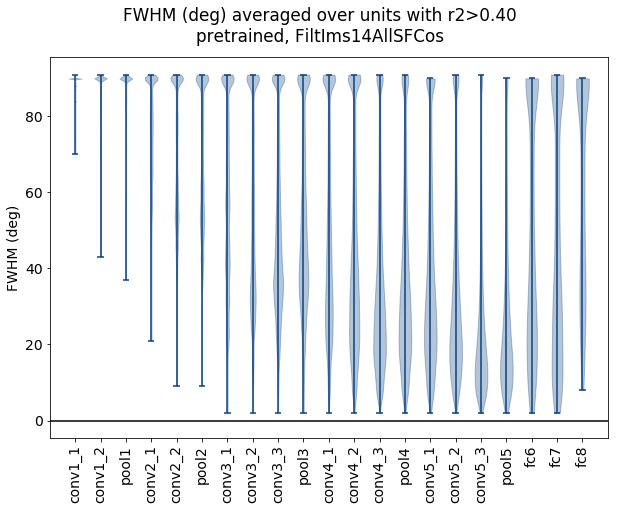

In [7]:
#%% plot the distribution of FWHM, as a function of layer

plt.rcParams.update({'font.size': 14})
plt.close('all')
fig=plt.figure()
layers2plot = np.arange(0,nLayers,1)

# loop over network layers
for ll in range(np.size(layers2plot)):
    vals_good = []
    for ii in range(nInits):
        
        # values to plot    
        rvals = deepcopy(np.squeeze(np.mean(r2_all[ii][layers2plot[ll]][:,sf,:],axis=1)))   
        # there are a few nans in here, putting a tiny value so it won't throw an error
        rvals[np.isnan(rvals)] = -1000
        parvals = deepcopy(np.squeeze(fit_pars_all[ii][ll][:,sf,4]))
        vals_good.append(parvals[rvals>r2_cutoff])

    vals_good = np.concatenate(vals_good, axis=0)
    parts = plt.violinplot(vals_good,[ll])
    for pc in parts['bodies']:
        pc.set_color(colors_main[color_ind,:])
    parts['cbars'].set_color(colors_main[color_ind,:])
    parts['cmins'].set_color(colors_main[color_ind,:])
    parts['cmaxes'].set_color(colors_main[color_ind,:])


# finish up this subplot 
ylims = [-0.5,1]
xlims = [-1, np.size(layers2plot)]

plt.plot(xlims, [0,0], 'k')
plt.xlim(xlims)
#plt.ylim(ylims)
#plt.yticks([-0.5,0, 0.5,1])
plt.ylabel('FWHM (deg)')
plt.xticks(np.arange(0,np.size(layers2plot),1),[layer_labels[ii] for ii in layers2plot],rotation=90)

# finish up the entire plot
plt.suptitle('FWHM (deg) averaged over units with r2>%.2f\n%s, %s'%(r2_cutoff,training_str, dataset))  
fig.set_size_inches(10,7)

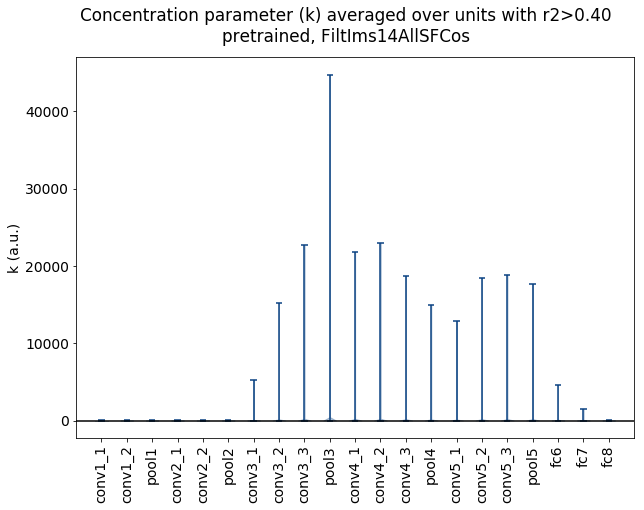

In [8]:
#%% plot the distribution of k, as a function of layer

plt.rcParams.update({'font.size': 14})
plt.close('all')
fig=plt.figure()
layers2plot = np.arange(0,nLayers,1)

# loop over network layers
for ll in range(np.size(layers2plot)):
    vals_good = []
    for ii in range(nInits):
        # values to plot    
        rvals = deepcopy(np.squeeze(np.mean(r2_all[ii][layers2plot[ll]][:,sf,:],axis=1)))   
        # there are a few nans in here, putting a tiny value so it won't throw an error
        rvals[np.isnan(rvals)] = -1000
        parvals = deepcopy(np.squeeze(fit_pars_all[ii][ll][:,sf,1]))
        vals_good.append(parvals[rvals>r2_cutoff])
        
    vals_good = np.concatenate(vals_good, axis=0)

    parts = plt.violinplot(vals_good,[ll])
    for pc in parts['bodies']:
        pc.set_color(colors_main[color_ind,:])
    parts['cbars'].set_color(colors_main[color_ind,:])
    parts['cmins'].set_color(colors_main[color_ind,:])
    parts['cmaxes'].set_color(colors_main[color_ind,:])
      

# finish up this subplot 
ylims = [-0.5,1]
xlims = [-1, np.size(layers2plot)]

plt.plot(xlims, [0,0], 'k')
plt.xlim(xlims)
#plt.ylim([-10,500])
#plt.yticks([-0.5,0, 0.5,1])
plt.ylabel('k (a.u.)')
plt.xticks(np.arange(0,np.size(layers2plot),1),[layer_labels[ii] for ii in layers2plot],rotation=90)

# finish up the entire plot
plt.suptitle('Concentration parameter (k) averaged over units with r2>%.2f\n%s, %s'%(r2_cutoff,training_str, dataset))  
fig.set_size_inches(10,7)

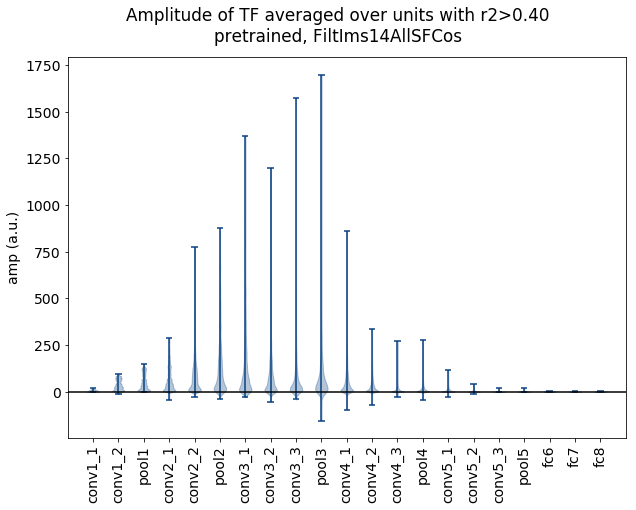

In [9]:
#%% plot the distribution of amplitudes, as a function of layer

plt.rcParams.update({'font.size': 14})
plt.close('all')
fig=plt.figure()
layers2plot = np.arange(0,nLayers,1)

# loop over network layers
for ll in range(np.size(layers2plot)):
    vals_good = []
    for ii in range(nInits):
        
        # values to plot    
        rvals = deepcopy(np.squeeze(np.mean(r2_all[ii][layers2plot[ll]][:,sf,:],axis=1)))   
        # there are a few nans in here, putting a tiny value so it won't throw an error
        rvals[np.isnan(rvals)] = -1000
        parvals = deepcopy(np.squeeze(fit_pars_all[ii][ll][:,sf,2]))
        vals_good.append(parvals[rvals>r2_cutoff])
        
    vals_good = np.concatenate(vals_good, axis=0)

    parts = plt.violinplot(vals_good,[ll])
    for pc in parts['bodies']:
        pc.set_color(colors_main[color_ind,:])
    parts['cbars'].set_color(colors_main[color_ind,:])
    parts['cmins'].set_color(colors_main[color_ind,:])
    parts['cmaxes'].set_color(colors_main[color_ind,:])

     

# finish up this subplot 
ylims = [-0.5,1]
xlims = [-1, np.size(layers2plot)]

plt.plot(xlims, [0,0], 'k')
plt.xlim(xlims)
#plt.ylim(ylims)
#plt.yticks([-0.5,0, 0.5,1])
plt.ylabel('amp (a.u.)')
plt.xticks(np.arange(0,np.size(layers2plot),1),[layer_labels[ii] for ii in layers2plot],rotation=90)

# finish up the entire plot
plt.suptitle('Amplitude of TF averaged over units with r2>%.2f\n%s, %s'%(r2_cutoff,training_str, dataset))  
fig.set_size_inches(10,7)
     

In [10]:
#%% Load some actual tfs from a single layer (slow)

ll=12 # which layer?
tr=0
ii=0
param_str = param_strs[ii]
save_path = os.path.join(root,'saved_analyses','unit_tuning',model,training_str,param_str,dataset) 
fn = os.path.join(save_path,'%s_all_responsive_units_eval_at_ckpt_%s0000.npy'%(layer_labels[ll],ckpt_num[0:2]))
print('loading from %s\n'%fn)
tfs=np.load(fn)

loading from /mnt/neurocube/local/serenceslab/maggie/biasCNN/saved_analyses/unit_tuning/vgg16/pretrained/params1/FiltIms14AllSFCos/conv4_3_all_responsive_units_eval_at_ckpt_00000.npy



Text(0.5,0.98,'pretrained, FiltIms14AllSFCos\nExamples of tuning curves, conv4_3')

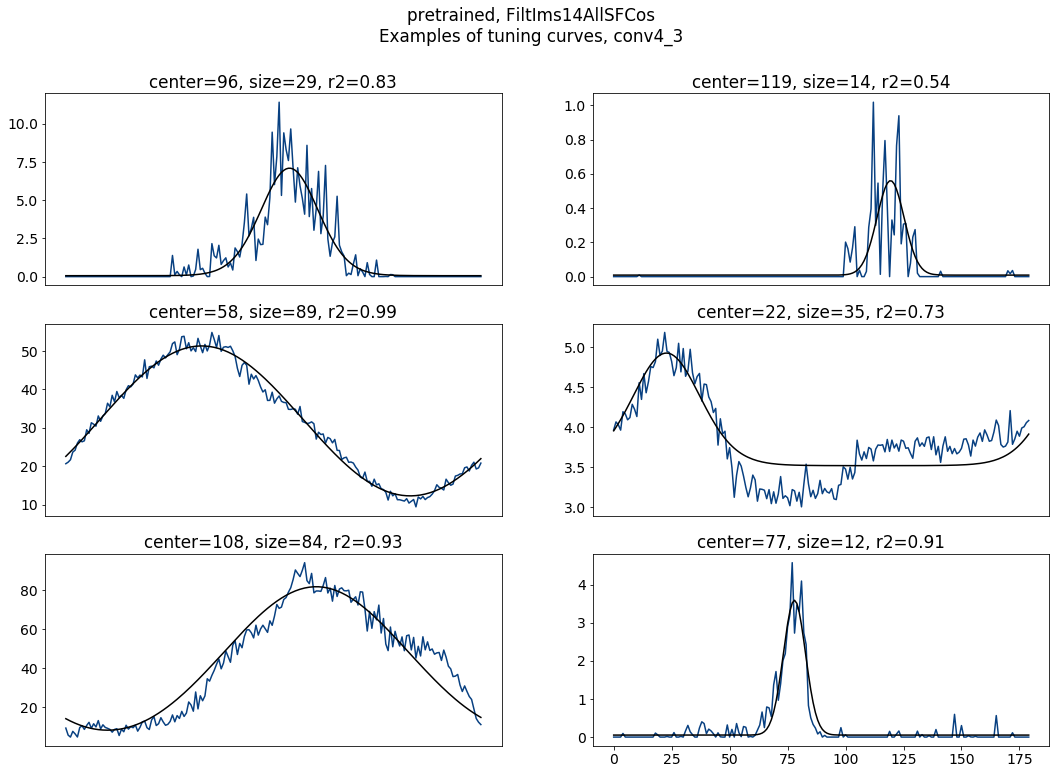

In [11]:
#%% Make plots of TFs from some randomly selected well-fit units 
plt.close('all')
nUnits = np.shape(tfs)[1]
nUnitsPlot = 6
r2_here=r2_cutoff
nOri=180
rvals = deepcopy(np.squeeze(np.mean(r2_all[ii][ll][:,sf,:],axis=1)))
cvals = deepcopy(np.squeeze(fit_pars_all[ii][ll][:,sf,0]))
avals = deepcopy(np.squeeze(fit_pars_all[ii][ll][:,sf,2]))
#
rvals[np.isnan(rvals)] = -1000

np.random.seed(769996)
# Now choose the units to plot, sorting by size
#units_good = np.where(np.logical_and(np.logical_and(np.logical_and(rvals>r2_here, ~np.isnan(cvals)), cvals>80), cvals<100))[0]
units_good = np.where(rvals>r2_here)[0]

units2plot = np.random.choice(units_good, nUnitsPlot, replace='False')

npx = np.ceil(np.sqrt(nUnitsPlot))
npy = np.ceil(nUnitsPlot/npx)

#% make the plot of these units of interest
plt.figure(figsize=(18,12));
for uu in range(nUnitsPlot):
  plt.subplot(npx,npy,uu+1)

  real_y = np.squeeze(tfs[ii,units2plot[uu],sf,0:nOri])
  pars = fit_pars_all[ii][ll][units2plot[uu],sf,:]
  ypred = analyze_orient_tuning_jitter.von_mises_deg(ori_axis, pars[0],pars[1],pars[2],pars[3])

  plt.plot(ori_axis, real_y, color=colors_main[color_ind,:]) 
  plt.plot(ori_axis, ypred,color=[0,0,0])
  plt.title('center=%d, size=%d, r2=%.2f'%(pars[0],pars[4], rvals[units2plot[uu]]))
  if uu!=nUnitsPlot-1:
    plt.xticks([])
plt.suptitle('%s, %s\nExamples of tuning curves, %s'%(training_str,dataset,layer_labels[ll]))

loading from /mnt/neurocube/local/serenceslab/maggie/biasCNN/weights/vgg16/pretrained/params1/AllNetworkWeights_eval_at_ckpt_00000.npy



Text(0.5,0.98,'pretrained - conv1_1\nall convolutional kernels')

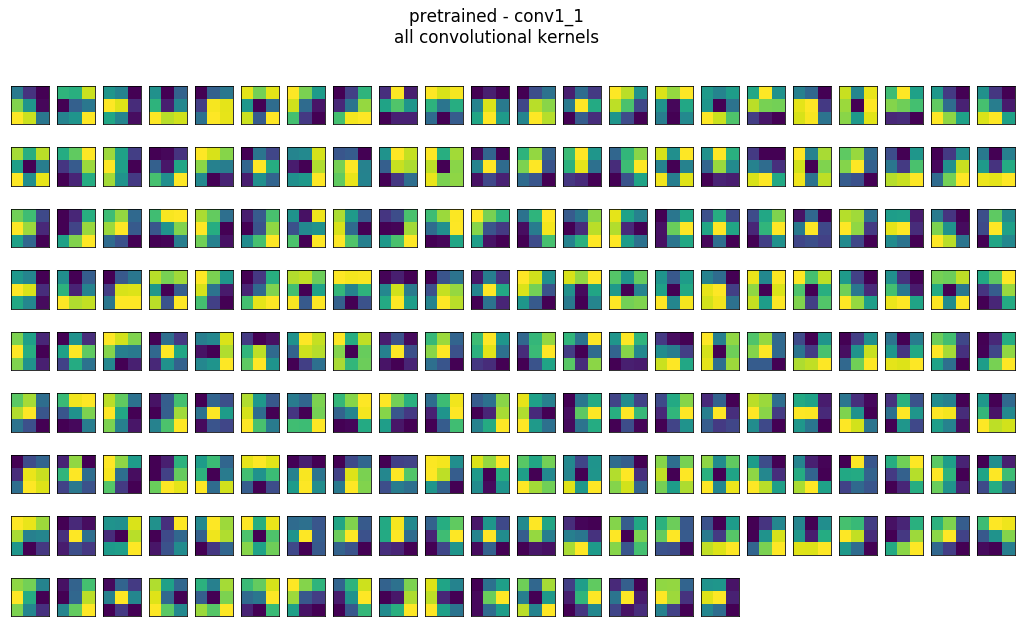

In [12]:
# Load and plot some actual weights from pretrained model (convolutional kernels)

param_str = param_strs[0]
weight_save_path = os.path.join(root,'weights',model,training_str,param_str)
   
file_name= os.path.join(weight_save_path,'AllNetworkWeights_eval_at_ckpt_%s0000.npy'%(ckpt_num[0:2]))
print('loading from %s\n'%file_name)
w_all = np.load(file_name)
w_layer_inds = np.asarray([0,1,3,4,6,7,8,10,11,12,14,15,16,18,19,20])
w_layer_labels = [layer_labels[ii] for ii in w_layer_inds if ii<nLayers]
 
#%% plot all the first layer filter kernels
sf=0
ll=0
w_ind= np.where(w_layer_inds==ll)[0][0]
noutputchans = info['output_chans'][w_ind]
ninputchans = 3

npx = 9
npy = np.ceil(noutputchans*ninputchans/npx)

plt.rcParams['figure.figsize']=[18,10]
plt.close('all')

plt.figure();
pi=0
for ii in range(ninputchans):
  for cc in range(noutputchans):
    
    pi=pi+1
    plt.subplot(npx,npy,pi)
    my_filter = np.squeeze(w_all[w_ind][:,:,ii,cc])
   
    plt.pcolormesh(my_filter)
    plt.axis('square')

    plt.xticks([])
    plt.yticks([])
#
plt.suptitle('%s - %s\nall convolutional kernels'%(training_str, layer_labels[ll]))   